# **Hotel Booking Final Project Machine Learning**

**Created by:** M Hassya S

### **Dataset Overview:**
The dataset `hotel_bookings.csv` contains comprehensive information about hotel booking records, showcasing various aspects of customer bookings for hotels. It encompasses data points such as booking status, customer details, stay duration, and financial aspects.

### **Context:**
An OTA has a historical dataset of hotel bookings of its lodging partners which has been compiled in an effort to increase ADR through fulfilling bookings whenever available. The OTA has initiated a project to aid lodging partners in determining whether a certain booking has a high probability of being canceled, which enables the lodging partners to open up the possibility of a double booking in order to avoid potential profit loss.

### **Problem Statement Machine Learning:**
- **Stakeholder:** OTA (Online Travel Agency)
- **Problem:** How can OTA aid in identifying which bookings have a high probability of being cancelled?
- **Reasoning:** High cancellation rates lead to reduced potential profits for lodging partners.
- **Goal:** To identify which bookings have a high probability of cancellation, so that lodging partners can open a double booking an accommodation to avoid loss.
- **Benefit of analysis:** OTA and its lodging partners can more effectively strategize pricing for their accommodations which could lead to more budget-friendly average daily rates and less cancellation.
- **Expected outcome:**
  - Classify and predict which bookings have a chance of high or low cancellation rate to allow for possible double bookings.
  - Classification:
    - **HIGH cancellation rate** => allow opportunity for double booking.
    - **LOW cancellation rate** => disallow opportunity for double booking.

### **Hypothetical Profit Loss Analysis Case Study:**
- **Scenario:** A mid-scale hotel "OceanView Hotel" with 100 rooms experiences a 20% cancellation rate on bookings, with most guests booking for an average stay of 3 nights.
- **Assumptions:**
  - Average Daily Rate (ADR): $150 per night.
  - Upscale Hotel Rate for last-minute bookings: Up to $300 per night.
  - Booking in Advance Rate: $209 per night.
- **Analysis:**
  - **Without Double Booking Strategy:** Potential loss of $125,400 per month from cancellations.
  - **With Double Booking Strategy:** A net potential gain of $210,600 per month, even after compensating for the risks of double booking.

### **Metric Evaluation:**
#### Definitions
- **True Positives (TP):** Correct predictions of cancellations.
- **True Negatives (TN):** Correct predictions of non-cancellations.
- **False Positives (FP):** Incorrect predictions of cancellations.
- **False Negatives (FN):** Incorrect predictions of non-cancellations.

#### Metrics Defined
- **Precision:** The accuracy of predicting cancellations.
- **Recall:** The ability to identify all actual cancellations.
- **F1 Score:** A balance between precision and recall.

#### Business Relevance
- **Precision:** Reduces costs by avoiding unnecessary preparations for bookings.
- **Recall:** Protects revenue by identifying likely cancellations.
- **F1 Score:** Balances precision and recall for model efficiency.

#### Prioritization
The focus on precision or recall depends on the business impact of false predictions. The F1 Score is considered for overall balance.

### **Project Limitation:**
- Inaccurate predictions due to unforeseen circumstances or missing data.
- Implementing a double booking strategy, as shown in the profit loss analysis case study, could substantially mitigate losses due to cancellations. However, the strategy requires careful consideration of operational and reputational costs.


## **Import Module**

In [1]:
# Import Module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


## **Load Dataset**

In [2]:
# Load the dataset
data = pd.read_csv('hotel_bookings.csv')

## **Data Understanding**

| Index | Attribute                        | Data Type | Description |
|-------|----------------------------------|-----------|-------------|
| 1     | hotel                            | object    | Type of hotel (Resort Hotel or City Hotel). |
| 2     | is_canceled                      | int64     | Indicates if the booking was canceled (1) or not (0). |
| 3     | lead_time                        | int64     | Number of days between booking and arrival. |
| 4     | arrival_date_year                | int64     | Year of arrival date. |
| 5     | arrival_date_month               | object    | Month of arrival date. |
| 6     | arrival_date_week_number         | int64     | Week number of the arrival date. |
| 7     | arrival_date_day_of_month        | int64     | Day of the month of the arrival date. |
| 8     | stays_in_weekend_nights          | int64     | Number of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel. |
| 9     | stays_in_week_nights             | int64     | Number of week nights (Mon-Fri) the guest stayed or booked to stay at the hotel. |
| 10    | adults                           | int64     | Number of adults. |
| 11    | children                         | float64   | Number of children. |
| 12    | babies                           | int64     | Number of babies. |
| 13    | meal                             | object    | Type of meal booked. |
| 14    | country                          | object    | Country of origin of the customer. |
| 15    | market_segment                   | object    | Market segment designation. |
| 16    | distribution_channel             | object    | Booking distribution channel. |
| 17    | is_repeated_guest                | int64     | Indicates if the guest is a repeat (1) or not (0). |
| 18    | previous_cancellations           | int64     | Number of previous bookings that were canceled by the customer. |
| 19    | previous_bookings_not_canceled   | int64     | Number of previous bookings not canceled by the customer. |
| 20    | reserved_room_type               | object    | Code of room type reserved. |
| 21    | assigned_room_type               | object    | Code for type of room assigned to the booking. |
| 22    | booking_changes                  | int64     | Number of changes/amendments made to the booking. |
| 23    | deposit_type                     | object    | Type of deposit made. |
| 24    | agent                            | float64   | ID of the travel agency that made the booking. |
| 25    | company                          | float64   | ID of the company that made the booking or responsible for paying the booking. |
| 26    | days_in_waiting_list             | int64     | Number of days the booking was on the waiting list before it was confirmed. |
| 27    | customer_type                    | object    | Type of booking, assuming one of several categories. |
| 28    | adr                              | float64   | Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights. |
| 29    | required_car_parking_spaces      | int64     | Number of car parking spaces required by the customer. |
| 30    | total_of_special_requests        | int64     | Number of special requests made by the customer. |
| 31    | reservation_status               | object    | Latest status of the reservation. |
| 32    | reservation_status_date          | object    | Date at which the last status was set. |

With regards to the above data understanding, it is deemed tha the amount of columns present should be sufficient in predicting the cancellation of booking rates.

## **Exploratory Data Analysis**


In [3]:
# Display the first few rows of the dataset
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Key Findings
- There is a column named "is_canceled" indicating whether a reservation was canceled (0 for not canceled, 1 for canceled).
- The dataset includes information about the lead time, arrival date, duration of stays, number of adults, and more.
- The "arrival_date_month" column represents the month of arrival in a textual format.
- There are columns like "required_car_parking_spaces" and "total_of_special_requests" that might be useful for analyzing guest preferences and needs.
- Some columns, such as "agent" and "company," contain missing values (NaN).
- The "deposit_type" column suggests that most reservations were made without a deposit.
- The "customer_type" column provides information about the type of customers (e.g., Transient).
- The "reservation_status" and "reservation_status_date" columns provide details about the status of reservations.


In [4]:
# Basic statistics of the dataset
basic_stats = data.describe(include='all')
basic_stats


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


### Key Findings:

- **General Information:**
  - Total records: 119,390
  - Types of hotels: "City Hotel" and "Resort Hotel"
  - Years covered: 2015 to 2017

- **hotel:**
  - Most frequent: "City Hotel" (79,330 occurrences)

- **is_canceled:**
  - Average cancellation rate: 37.04%

- **lead_time:**
  - Average lead time: 104 days

- **arrival_date_year:**
  - Most common year: 2016

- **arrival_date_month:**
  - Most common month: August

- **arrival_date_week_number:**
  - Average week number: 27

- **arrival_date_day_of_month:**
  - Average day of the month: 15

- **stays_in_weekend_nights:**
  - Average weekend nights: 0.93

- **stays_in_week_nights:**
  - Average weeknights: 2.5

- **adults:**
  - Average number of adults: 1.86

- **...** (Similar statistics can be provided for other columns in the dataset.)

- **deposit_type:**
  - Most common deposit type: "No Deposit"

- **agent:**
  - Average agent value: 86.69 (with some missing values)

- **company:**
  - Average company value: 189.27 (with many missing values)

- **days_in_waiting_list:**
  - Average waiting time: 2.32 days

- **customer_type:**
  - Most common customer type: "Transient"

- **adr:**
  - Average daily rate (ADR): 101.83

- **required_car_parking_spaces:**
  - Average parking spaces: 0.06

- **total_of_special_requests:**
  - Average special requests: 0.57

- **reservation_status:**
  - Most common reservation status: "Check-Out"

- **reservation_status_date:**
  - Most common status date: "2015-10-21"

- **Data Range:**
  - "lead_time" ranges from 0 to 737 days.
  - "stays_in_weekend_nights" ranges from 0 to 19 nights.
  - "stays_in_week_nights" ranges from 0 to 50 nights.
  - ... (Similar ranges for other columns.)

### Missing Value:

In [5]:
# Create a DataFrame with missing values count for each column
missing_values_df = data.isnull().sum().reset_index()
missing_values_df.columns = ['Attribute', 'Missing Values']

# Display the DataFrame
missing_values_df

,Attribute,Missing Values
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_week_number,0
6,arrival_date_day_of_month,0
7,stays_in_weekend_nights,0
8,stays_in_week_nights,0
9,adults,0


### Missing value findings:
* children = 4 missing values
* country = 488 missing values
* agent = 16,340 missing values
* company = 112,593 missing values

### Cardinality:

In [6]:
#Identify categorical columns in the DataFrame
categorical_cols = data.select_dtypes(include=['object']).columns

# Calculate cardinality for each categorical feature and collect the unique values as a string
cardinality_summary = pd.DataFrame({
    'Feature': categorical_cols,
    'Cardinality': [data[col].nunique() for col in categorical_cols],
    'Values': [str(data[col].unique()) for col in categorical_cols]
})

# Display the cardinality summary table
cardinality_summary


,Feature,Cardinality,Values
0,hotel,2,['Resort Hotel' 'City Hotel']
1,arrival_date_month,12,['July' 'August' 'September' 'October' 'Novemb...
2,meal,5,['BB' 'FB' 'HB' 'SC' 'Undefined']
3,country,177,['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU'...
4,market_segment,8,['Direct' 'Corporate' 'Online TA' 'Offline TA/...
5,distribution_channel,5,['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
6,reserved_room_type,10,['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
7,assigned_room_type,12,['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
8,deposit_type,3,['No Deposit' 'Refundable' 'Non Refund']
9,customer_type,4,['Transient' 'Contract' 'Transient-Party' 'Gro...


### Key Findings:

- **hotel:** 2 unique values
- **arrival_date_month:** 12 unique values
- **meal:** 5 unique values
- **country:** 177 unique values
- **market_segment:** 8 unique values
- **distribution_channel:** 5 unique values
- **reserved_room_type:** 10 unique values
- **assigned_room_type:** 12 unique values
- **deposit_type:** 3 unique values
- **customer_type:** 4 unique values
- **reservation_status:** 3 unique values
- **reservation_status_date:** 926 unique values



### Duplicate:

In [7]:
data.fillna('').values.tolist()

[['Resort Hotel',
  0,
  342,
  2015,
  'July',
  27,
  1,
  0,
  0,
  2,
  0.0,
  0,
  'BB',
  'PRT',
  'Direct',
  'Direct',
  0,
  0,
  0,
  'C',
  'C',
  3,
  'No Deposit',
  '',
  '',
  0,
  'Transient',
  0.0,
  0,
  0,
  'Check-Out',
  '2015-07-01'],
 ['Resort Hotel',
  0,
  737,
  2015,
  'July',
  27,
  1,
  0,
  0,
  2,
  0.0,
  0,
  'BB',
  'PRT',
  'Direct',
  'Direct',
  0,
  0,
  0,
  'C',
  'C',
  4,
  'No Deposit',
  '',
  '',
  0,
  'Transient',
  0.0,
  0,
  0,
  'Check-Out',
  '2015-07-01'],
 ['Resort Hotel',
  0,
  7,
  2015,
  'July',
  27,
  1,
  0,
  1,
  1,
  0.0,
  0,
  'BB',
  'GBR',
  'Direct',
  'Direct',
  0,
  0,
  0,
  'A',
  'C',
  0,
  'No Deposit',
  '',
  '',
  0,
  'Transient',
  75.0,
  0,
  0,
  'Check-Out',
  '2015-07-02'],
 ['Resort Hotel',
  0,
  13,
  2015,
  'July',
  27,
  1,
  0,
  1,
  1,
  0.0,
  0,
  'BB',
  'GBR',
  'Corporate',
  'Corporate',
  0,
  0,
  0,
  'A',
  'A',
  0,
  'No Deposit',
  304.0,
  '',
  0,
  'Transient',
  75.0,
  

The code `data.fillna('').values.tolist()` converts a DataFrame (`data`) into a list of lists, replacing missing values with empty strings in the process.

In [8]:
data['keys']= pd.Series(data.fillna('').values.tolist()).apply(lambda x: ''.join(map(str, x)))

The code `data['keys'] = pd.Series(data.fillna('').values.tolist()).apply(lambda x: ''.join(map(str, x)))` creates a new column named 'keys' in the DataFrame `data`. This new column contains concatenated string representations of each row in the DataFrame, where missing values are replaced by empty strings (''). The lambda function is used to convert each row into a string and join its elements together.

In [9]:
data['keys'].duplicated().sum()

31996

Display how many duplicates has appeared from the column 'keys' which result in 31,996 duplicates present in the original dataset.

### Rare Labels:

In [10]:
def find_rare_labels_count(data, threshold=0.01):
    rare_labels_count = {}
    for column in data.select_dtypes(include=['object']).columns:
        total_count = len(data[column])
        rare_count = sum(data[column].value_counts(normalize=True) < threshold)
        rare_labels_count[column] = [rare_count, total_count]
    return pd.DataFrame(rare_labels_count, index=['Rare Labels Count', 'Total Labels Count']).T

# Calculate and display the count of rare labels compared to total labels for each column
rare_labels_count_df = find_rare_labels_count(data, 0.01)
rare_labels_count_df


,Rare Labels Count,Total Labels Count
hotel,0,119390
arrival_date_month,0,119390
meal,2,119390
country,163,119390
market_segment,3,119390
distribution_channel,2,119390
reserved_room_type,5,119390
assigned_room_type,5,119390
deposit_type,1,119390
customer_type,1,119390


Rare Label Findings:

* Most features have no rare labels, indicating relatively even distribution.
* 'country' has 163 rare labels, suggesting a wide range of countries with varying representation.
* 'reservation_status_date' has 925 rare labels, indicating a large number of unique dates with varying reservation counts
* Several features have a small number of rare labels (e.g., 'meal,' 'market_segment,' 'distribution_channel,' 'reserved_room_type,' 'assigned_room_type,' 'deposit_type,' and 'customer_type'), suggesting dominance by a few categories.






### Cardinality:

In [11]:
column_cardinality = data.nunique().reset_index()
column_cardinality.columns = ['Attribute', 'Cardinality']
column_cardinality['Format'] = data.dtypes.reset_index()[0]

column_cardinality

,Attribute,Cardinality,Format
0,hotel,2,object
1,is_canceled,2,int64
2,lead_time,479,int64
3,arrival_date_year,3,int64
4,arrival_date_month,12,object
5,arrival_date_week_number,53,int64
6,arrival_date_day_of_month,31,int64
7,stays_in_weekend_nights,17,int64
8,stays_in_week_nights,35,int64
9,adults,14,int64


Key Findings:


* Categorical Columns:
  * Several columns have low cardinality (e.g., 'hotel,' 'is_canceled,' 'arrival_date_year,' 'is_repeated_guest,' 'deposit_type,' 'customer_type,' 'reservation_status') with only a few unique values.
'arrival_date_month,' 'meal,' 'country,' 'market_segment,' 'distribution_channel,' 'reserved_room_type,' 'assigned_room_type,' and 'reservation_status_date' are categorical columns with higher cardinality.

* Numerical Columns:
  * Numerical columns like 'lead_time,' 'arrival_date_week_number,' 'arrival_date_day_of_month,' 'stays_in_weekend_nights,' 'stays_in_week_nights,' 'adults,' 'children,' 'babies,' 'previous_cancellations,' 'previous_bookings_not_canceled,' 'booking_changes,' 'agent,' 'company,' 'days_in_waiting_list,' 'adr,' 'required_car_parking_spaces,' and 'total_of_special_requests' have varying levels of cardinality, reflecting the diversity of values within these features.
  * Some columns, such as 'arrival_date_month,' 'meal,' 'country,' 'market_segment,' 'distribution_channel,' 'reserved_room_type,' 'assigned_room_type,' 'deposit_type,' 'customer_type,' and 'reservation_status_date,' may require special handling or encoding when used in machine learning models due to their higher cardinality
  * 'reservation_status_date' has the highest cardinality with 926 unique values, indicating a wide range of reservation status dates in the dataset.

### Correlation Chart for Numerical Columns

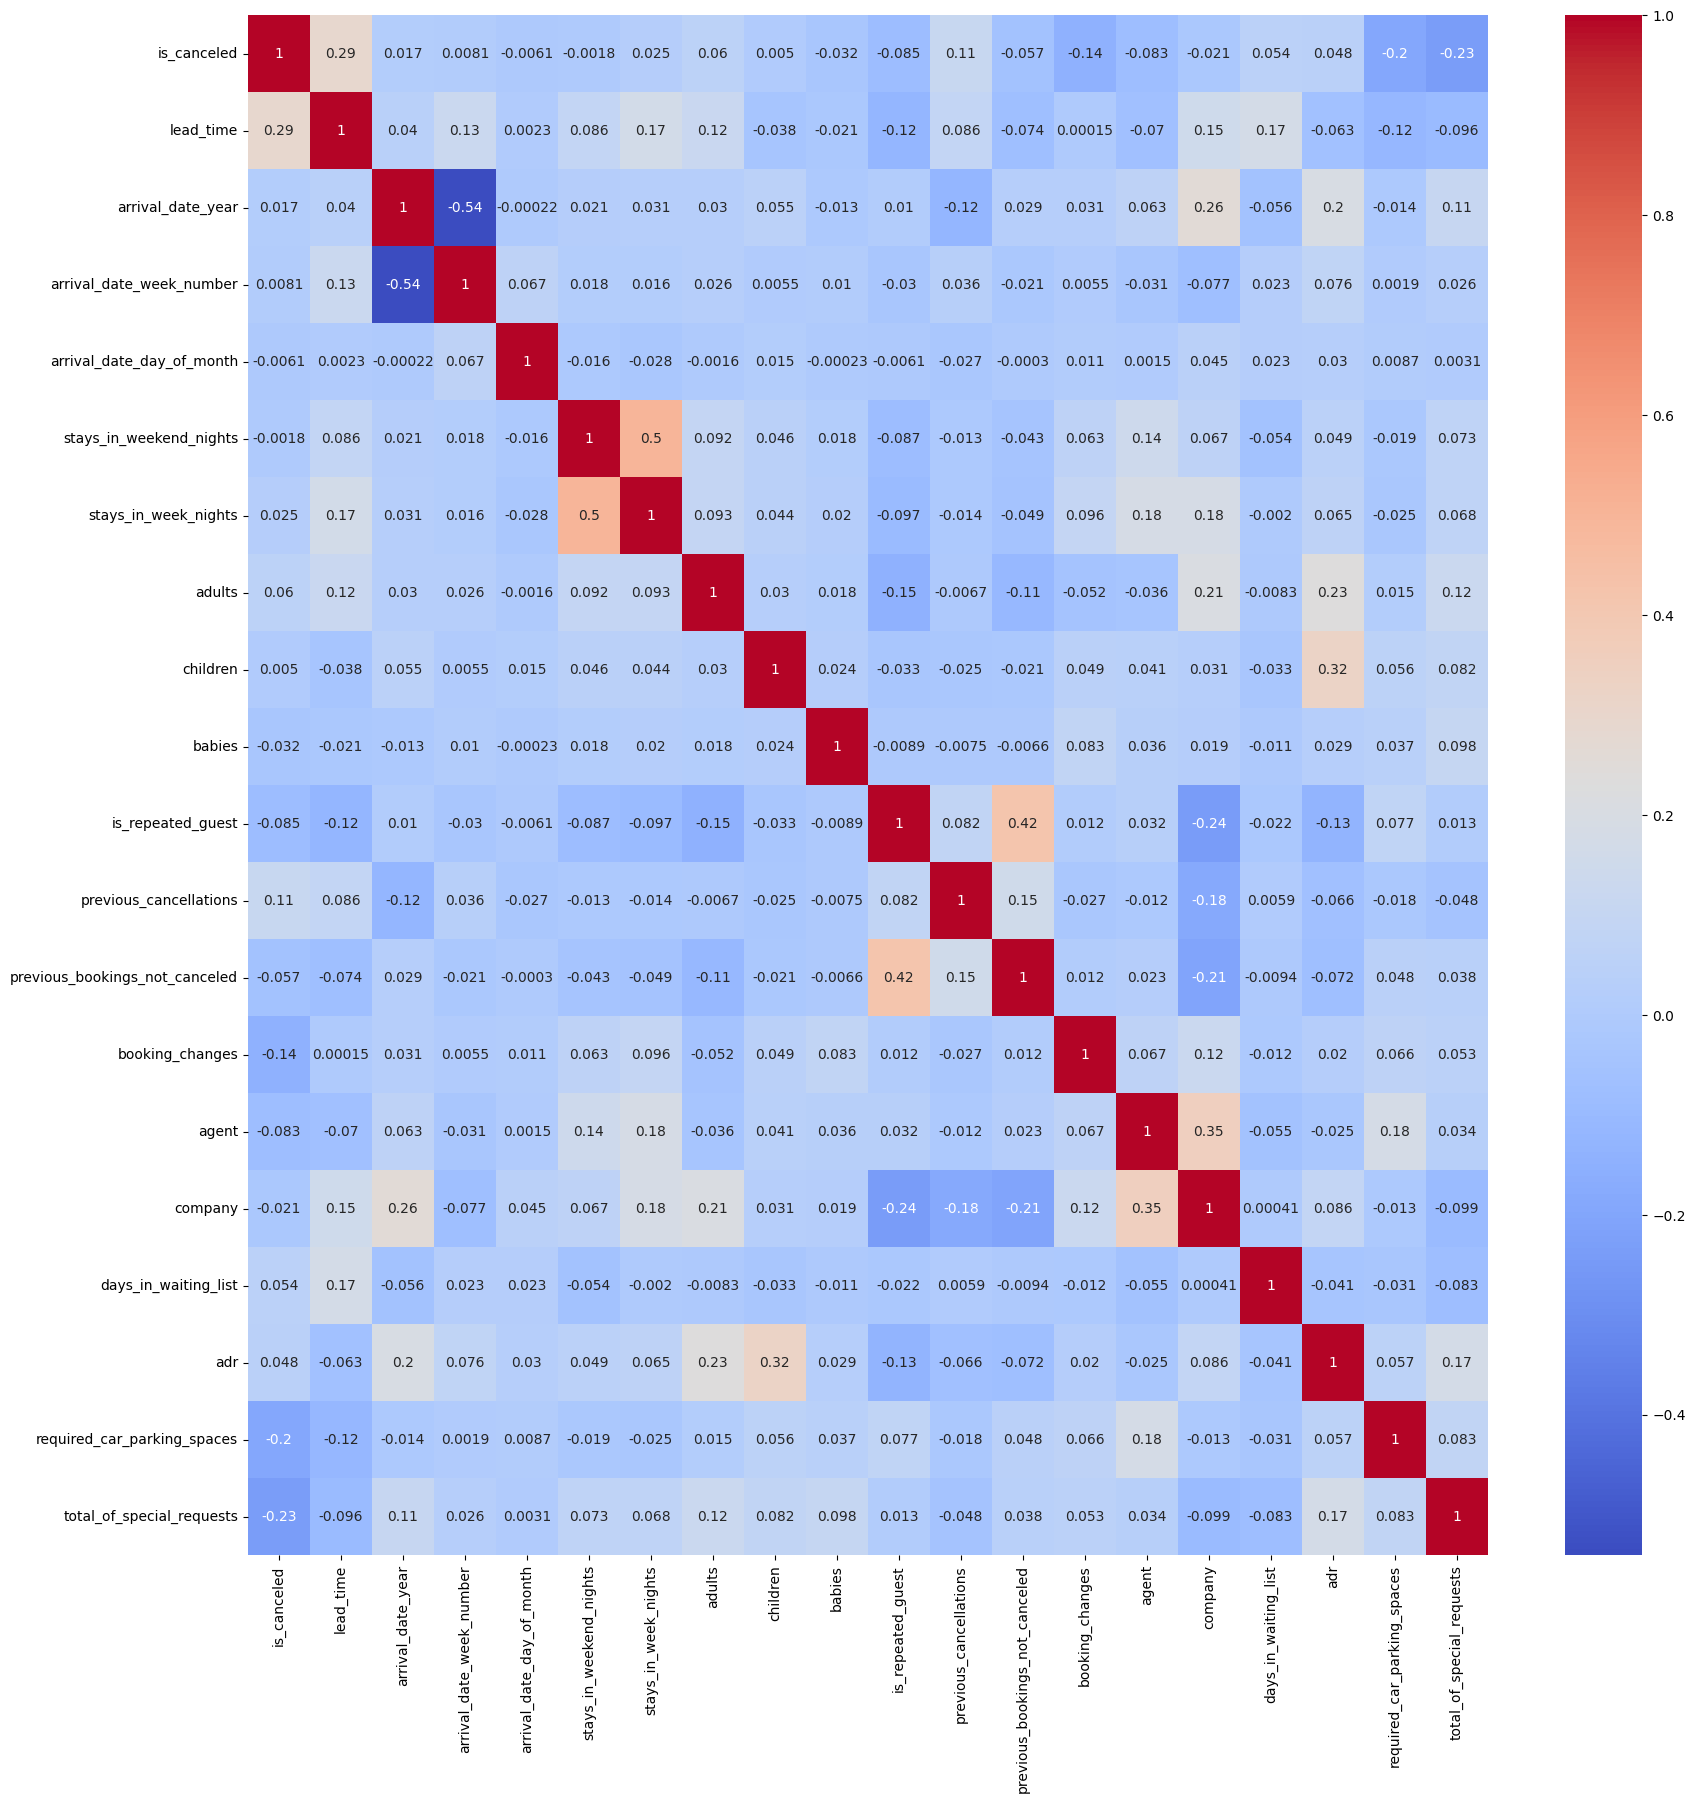

In [12]:
# Select only numerical columns from the DataFrame
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Correlation matrix for only numerical columns
corr_matrix = numerical_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


### Summary of Correlation with `is_canceled`

The heatmap indicates the correlation between various features and the target variable `is_canceled`. Below is a summary of the results:

- `lead_time`: Shows a **strong positive correlation** with `is_canceled`, suggesting that longer lead times may be associated with a higher likelihood of cancellation.

- `total_of_special_requests`: Indicates a **strong negative correlation** with `is_canceled`, implying that more special requests are associated with a lower likelihood of cancellation.

- `previous_cancellations`: Exhibits a **positive correlation** with `is_canceled`, meaning a history of previous cancellations might predict future cancellations.

- `previous_bookings_not_canceled`: Has a **negative correlation** with `is_canceled`, suggesting that a history of not canceling could predict lower cancellation rates.

- `agent` and `company`: Both show a **negative correlation** with `is_canceled`, indicating that bookings made through certain agents or companies may have a lower chance of being canceled.

- `required_car_parking_spaces`: Reveals a **strong negative correlation** with `is_canceled`, which suggests that bookings requiring parking are less likely to be canceled.

- `adults`, `children`, and `babies`: These features have a **very weak correlation** with `is_canceled`, indicating that the number of people of different age groups does not significantly affect cancellation likelihood.

- `booking_changes`: Shows a **moderately negative correlation** with `is_canceled`, indicating that bookings which undergo changes are less likely to be canceled.

- `days_in_waiting_list`: Has a **weak negative correlation** with `is_canceled`, which might suggest that a longer waiting period is slightly associated with a lower likelihood of cancellation.



### Boxplot for Numerical Outliers

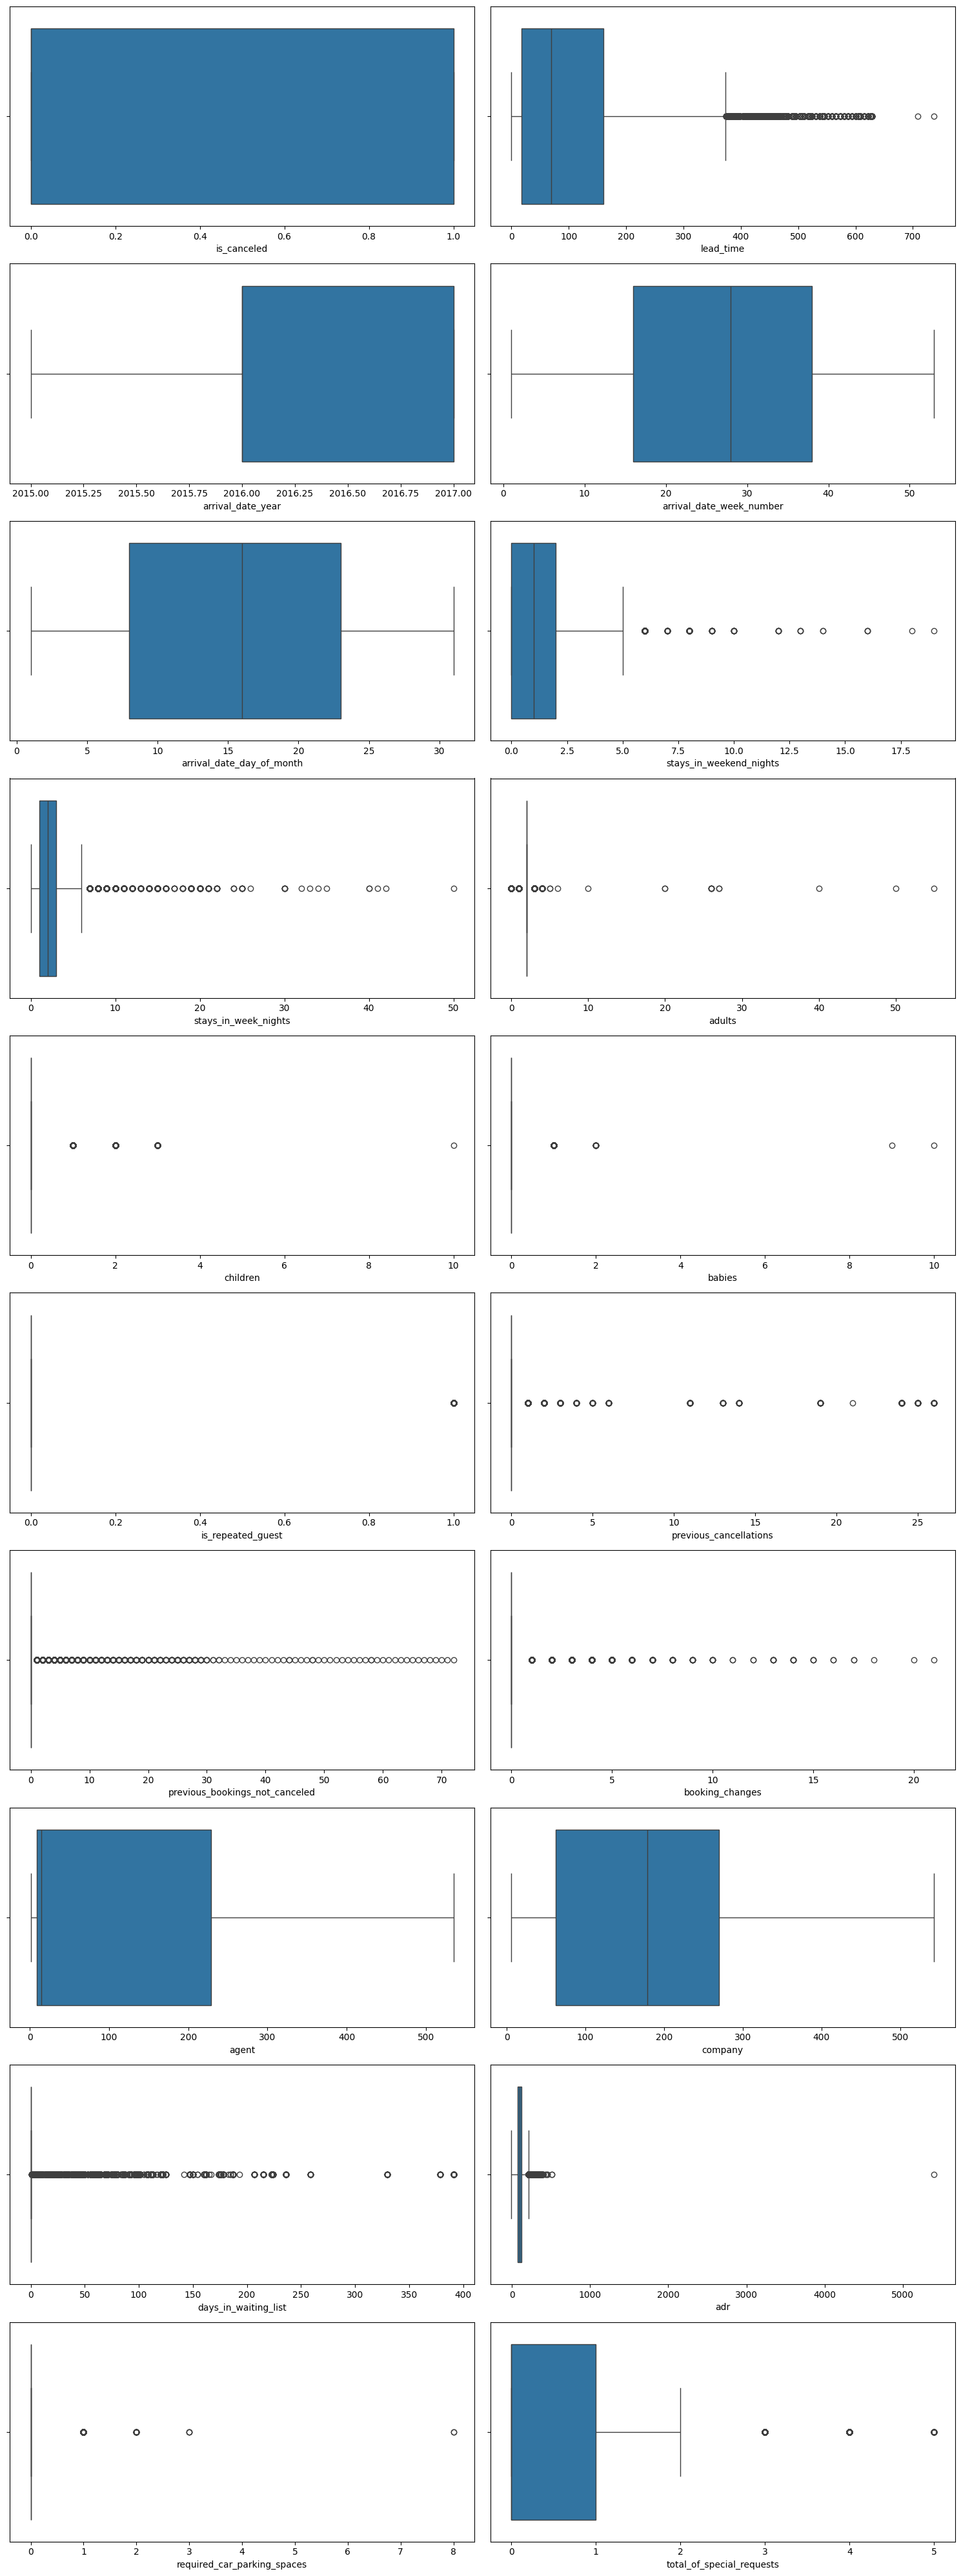

In [41]:
# Select only non-categorical (numerical) columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Number of rows and columns for the subplot
n_rows = len(numerical_cols) // 2 + len(numerical_cols) % 2
n_cols = 2

# Create a large figure to hold all the subplots
plt.figure(figsize=(15, n_rows * 4))

# Loop through the numerical columns and create a boxplot for each
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=data[col])

# Adjust the layout
plt.tight_layout()
plt.show()


**Summary of Distribution Boxplots**

The boxplot visualizations provide insights into the distribution of various features within the dataset:

- **`is_canceled`**: This binary feature shows a clear dichotomy, indicating the dataset includes both canceled and not canceled bookings.

- **`lead_time`**: There are many outliers, suggesting that while most bookings are made within a shorter timeframe, there are bookings made well in advance.

- **`arrival_date_year`**: Data is spread across at least three years, with a fairly even distribution.

- **`arrival_date_week_number`** and **`arrival_date_day_of_month`**: Bookings are distributed throughout the year and month, with no apparent outliers.

- **`stays_in_weekend_nights`**, **`stays_in_week_nights`**: Most stays are short, with a few outliers indicating longer stays.

- **`adults`**, **`children`**, **`babies`**: Most bookings are made for adults with few for children and babies, indicating typical guest compositions.

- **`is_repeated_guest`**: The distribution shows that most guests are not repeat customers.

- **`previous_cancellations`**, **`previous_bookings_not_canceled`**: There are guests with previous cancellations and bookings, but the number is low compared to first-time bookers.

- **`booking_changes`**, **`agent`**, **`company`**: A few bookings have changes, and most bookings are made without agents or company affiliations.

- **`days_in_waiting_list`**: Most bookings have a short waiting time, but there are some with significantly longer waits.

- **`adr`** (Average Daily Rate): Varies widely among bookings, with some high outliers.

- **`required_car_parking_spaces`**, **`total_of_special_requests`**: These features have a concentration of values at the lower end, with a few higher values as outliers.

These boxplots highlight the presence of outliers in certain features and the variability within the dataset, which could influence the performance of predictive models.


### Histogram for Numerical Columns

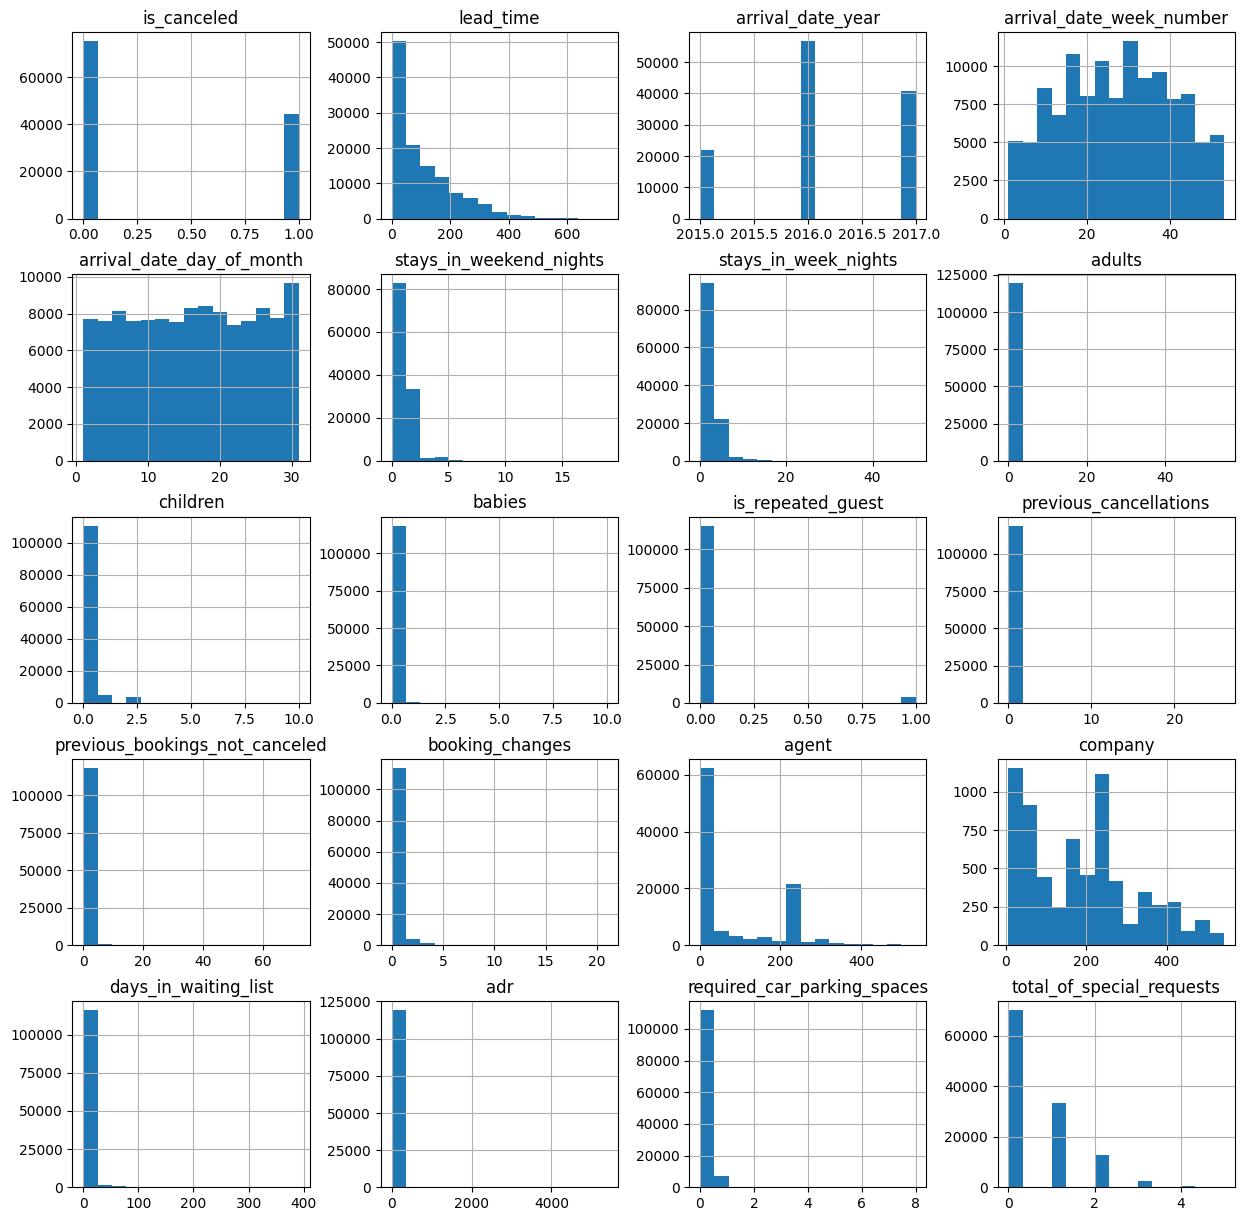

In [42]:
 # Histograms for numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols].hist(bins=15, figsize=(15, 15))
plt.show()


## Summary of Feature Histograms

The histograms provide a graphical representation of the frequency distribution of each feature:

- **`is_canceled`**: Shows the count of canceled versus not canceled bookings. There seems to be an imbalance between canceled and is_canceled which needs to be handled as it will create bias in the model later on.

- **`lead_time`**: Most bookings are made with a relatively short lead time.

- **`arrival_date_year`**: Distribution across the years covered in the dataset.

- **`arrival_date_week_number`**, **`arrival_date_day_of_month`**: Display the frequency of bookings across different weeks of the year and days of the month.

- **`stays_in_weekend_nights`**, **`stays_in_week_nights`**: Most bookings are for shorter durations, with a few for longer stays.

- **`adults`**, **`children`**, **`babies`**: The majority of bookings are for adults.

- **`is_repeated_guest`**: Indicates that most bookings are from first-time guests.

- **`previous_cancellations`**, **`previous_bookings_not_canceled`**: Most guests do not have a history of cancellations or previous bookings.

- **`booking_changes`**: Few bookings undergo changes after being made.

- **`agent`**, **`company`**: Shows which agents and companies are associated with the bookings.

- **`days_in_waiting_list`**: Most guests are not placed on a waiting list for a long period.

- **`adr`** (Average Daily Rate): Most bookings fall within a lower average daily rate, with some higher rates less common.

- **`required_car_parking_spaces`**: Indicates that car parking is not commonly required with bookings.

- **`total_of_special_requests`**: Most bookings have few or no special requests.


## **Data Preprocessing**

### Handling Missing Values
* Drop columns; 'company' and 'agent' due to their small irrelevance to the target "is_canceled" 

In [44]:
# Drop the columns'company', and 'agent' from the dataframe
data_dropped = data.drop(columns=['company', 'agent'])

# Create a new dataframe called cleaned_df_ml for the newly updated dataset
cleaned_df_ml = data_dropped

# Display the first few rows of cleaned_df_ml
cleaned_df_ml.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,keys
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Resort Hotel03422015July2710020.00BBPRTDirectD...
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Resort Hotel07372015July2710020.00BBPRTDirectD...
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,Resort Hotel072015July2710110.00BBGBRDirectDir...
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,Resort Hotel0132015July2710110.00BBGBRCorporat...
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,Resort Hotel0142015July2710220.00BBGBROnline T...


In [45]:
cleaned_df_ml.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

**Missing Values Result:**
- Company and Agent have been successfuly dropped as the columns show that there are no NaN values. Numerical column 'babies' will be imputed by its mean and country by mode utilizing pycaret preprocessing later on in the modeling section.

### Duplicates

In [46]:
cleaned_df_ml = cleaned_df_ml.drop_duplicates ( subset= "keys", keep="first")

- drop_duplicates(subset="keys", keep="first"): 
  - This method removes duplicate rows based on the keys column. If multiple entries have the same key, only the first occurrence is kept, and subsequent duplicates are removed. This ensures that each key is unique within the dataset, which is crucial for maintaining data integrity.

In [47]:
cleaned_df_ml.duplicated().sum()

0

- duplicated().sum(): 
    - This chain of methods checks for duplicate rows in the entire DataFrame and then sums up the count of duplicated rows. A result of 0 confirms that there are no duplicate entries left in the dataset.
    - The duplicates have been successfully dropped as the result = 0

### Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of columns to be label encoded (update this list based on the analysis)
columns_to_encode = ['country', 'hotel', 'customer_type', 'market_segment', 'distribution_channel',
      'deposit_type','reserved_room_type', 'arrival_date_month']

# Apply label encoding to each column in the list
for column in columns_to_encode:
    cleaned_df_ml[column] = label_encoder.fit_transform(cleaned_df_ml[column])

# Display the first few rows of the updated DataFrame
cleaned_df_ml.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3652\1878257187.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_ml[column] = label_encoder.fit_transform(cleaned_df_ml[column])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3652\1878257187.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_ml[column] = label_encoder.fit_transform(cleaned_df_ml[column])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3652\1878257187.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,keys
0,1,0,342,2015,5,27,1,0,0,2,...,3,0,0,2,0.0,0,0,Check-Out,2015-07-01,Resort Hotel03422015July2710020.00BBPRTDirectD...
1,1,0,737,2015,5,27,1,0,0,2,...,4,0,0,2,0.0,0,0,Check-Out,2015-07-01,Resort Hotel07372015July2710020.00BBPRTDirectD...
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,0,2,75.0,0,0,Check-Out,2015-07-02,Resort Hotel072015July2710110.00BBGBRDirectDir...
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,2,75.0,0,0,Check-Out,2015-07-02,Resort Hotel0132015July2710110.00BBGBRCorporat...
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,2,98.0,0,1,Check-Out,2015-07-03,Resort Hotel0142015July2710220.00BBGBROnline T...


- Label Encoding selected categorical columns as the classification model cannot interpret strings and can only interpret numbers
- Label encoding is chosen because the selected column and their respective contents show no specific order or rank and does not introduce new columns which can hamper the model's future performance

### Drop column 'keys'

In [49]:
# Drop the columns 'keys' from the dataframe
data_dropped = cleaned_df_ml.drop(columns=['keys'])

# Create a new dataframe called cleaned_df_ml for the newly updated dataset
cleaned_df_ml = data_dropped

# Display the first few rows of cleaned_df_ml
cleaned_df_ml.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,C,3,0,0,2,0.0,0,0,Check-Out,2015-07-01
1,1,0,737,2015,5,27,1,0,0,2,...,C,4,0,0,2,0.0,0,0,Check-Out,2015-07-01
2,1,0,7,2015,5,27,1,0,1,1,...,C,0,0,0,2,75.0,0,0,Check-Out,2015-07-02
3,1,0,13,2015,5,27,1,0,1,1,...,A,0,0,0,2,75.0,0,0,Check-Out,2015-07-02
4,1,0,14,2015,5,27,1,0,2,2,...,A,0,0,0,2,98.0,0,1,Check-Out,2015-07-03


- Dropping the column keys as it is not needed and will introduce noise if it is kept

### Feature Engineering

In [50]:
# Convert the 'reservation_status_date' column to datetime format
cleaned_df_ml['reservation_status_date'] = pd.to_datetime(cleaned_df_ml['reservation_status_date'])

# Extract the month and create a new column
cleaned_df_ml['reservation_status_month'] = cleaned_df_ml['reservation_status_date'].dt.month

# Display the first few rows to confirm
cleaned_df_ml[['reservation_status_date', 'reservation_status_month']].head()


,reservation_status_date,reservation_status_month
0,2015-07-01,7
1,2015-07-01,7
2,2015-07-02,7
3,2015-07-02,7
4,2015-07-03,7


- Extract reservation status month from reservation status date in order to show correlation between arrival date month and reservation status date

### Occupants Value Check

In [51]:
# Check the number of rows where 'adults', 'babies' and 'children' are equal to zero
cleaned_df_ml[cleaned_df_ml['adults']+cleaned_df_ml['babies']+cleaned_df_ml['children'] == 0].shape

(166, 31)

**Identifying and Removing Invalid Bookings**

In the context of hotel bookings, a reservation must have at least one adult, child, or baby associated with it. Therefore, records where the count of adults, children, and babies is zero do not represent valid bookings and cannot contribute valuable information to the predictive model.

Upon examination of the dataset, we identified a subset of rows (specifically, 166 entries) where the number of adults, babies, and children are all recorded as zero. These rows are considered anomalies and unlikely to be representative of genuine bookings.

To maintain the integrity of our dataset and the accuracy of our model, we have decided to remove these rows. This action ensures that the learning algorithm is not influenced by these anomalous records, which could potentially skew the model's performance.

In [52]:
cleaned_df_ml = cleaned_df_ml.drop(cleaned_df_ml[cleaned_df_ml['adults']+cleaned_df_ml['babies']+cleaned_df_ml['children'] == 0].index, inplace = False)

- Successfully dropped all bookings with 0 occupants

### Feature Selection

In [53]:
# Columns to keep
columns_to_keep = ['is_canceled','country', 'market_segment','deposit_type', 'total_of_special_requests', 'reservation_status_month', 'arrival_date_month', 'lead_time']
# Drop all other columns except the ones listed above
cleaned_df_ml =  cleaned_df_ml[columns_to_keep]

# Display the first few rows of the updated DataFrame
cleaned_df_ml.head()

,is_canceled,country,market_segment,deposit_type,total_of_special_requests,reservation_status_month,arrival_date_month,lead_time
0,0,135,3,0,0,7,5,342
1,0,135,3,0,0,7,5,737
2,0,59,3,0,0,7,5,7
3,0,59,2,0,0,7,5,13
4,0,59,6,0,1,7,5,14


- Use only features is_canceled, country, market segment, deposit type, total of special requests, reservation status month, arrival date month and lead time

### Correlation Matrix

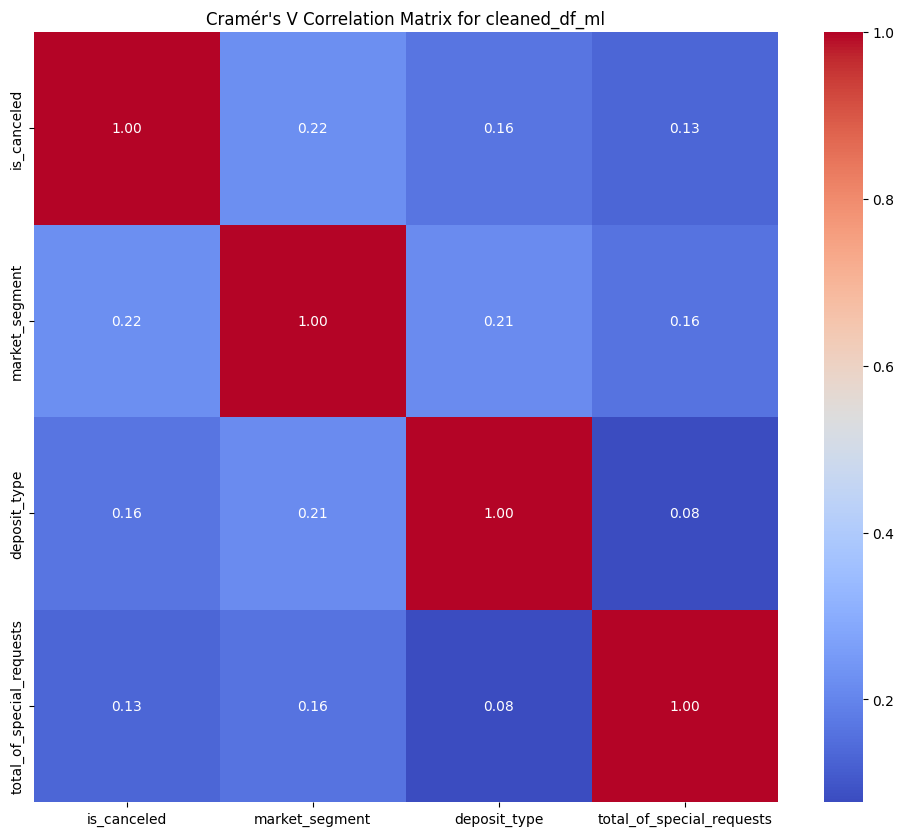

In [54]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def cramers_v(confusion_matrix):
    """Calculate Cramér's V statistic for a given chi-squared statistic."""
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Identify categorical columns in the cleaned_df_ml DataFrame
categorical_columns = [col for col in cleaned_df_ml.columns 
                       if cleaned_df_ml[col].dtype == 'object' or len(cleaned_df_ml[col].unique()) < 10]

# Initialize an empty DataFrame to store Cramér's V values
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Calculate Cramér's V for each pair of categorical columns in cleaned_df_ml
for col1 in categorical_columns:
    for col2 in categorical_columns:
        confusion_matrix = pd.crosstab(cleaned_df_ml[col1], cleaned_df_ml[col2])
        cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

# Convert the matrix to float type for plotting
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plotting the heatmap of Cramér's V Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Cramér's V Correlation Matrix for cleaned_df_ml")
plt.show()


 **Insights from Cramér's V Correlation Matrix**

The heatmap visualizes the Cramér's V statistic between pairs of categorical variables in the `cleaned_df_ml` dataset, offering a measure of association strength.

- Diagonal values are 1.00, as expected, since a variable has a perfect relationship with itself.
- The variables `is_canceled` and `market_segment` have a moderate association with a Cramér's V value of 0.22, suggesting some relationship worth exploring.
- `deposit_type` shows a moderate association with both `is_canceled` and `market_segment` (0.16 and 0.21 respectively), indicating these features may influence the booking cancellation or the segment to which the booking belongs.
- `total_of_special_requests` has relatively low association with other variables, with the highest being 0.16 with `market_segment`, which could imply that special requests do not significantly influence cancellation, market segment, or deposit type in a booking.

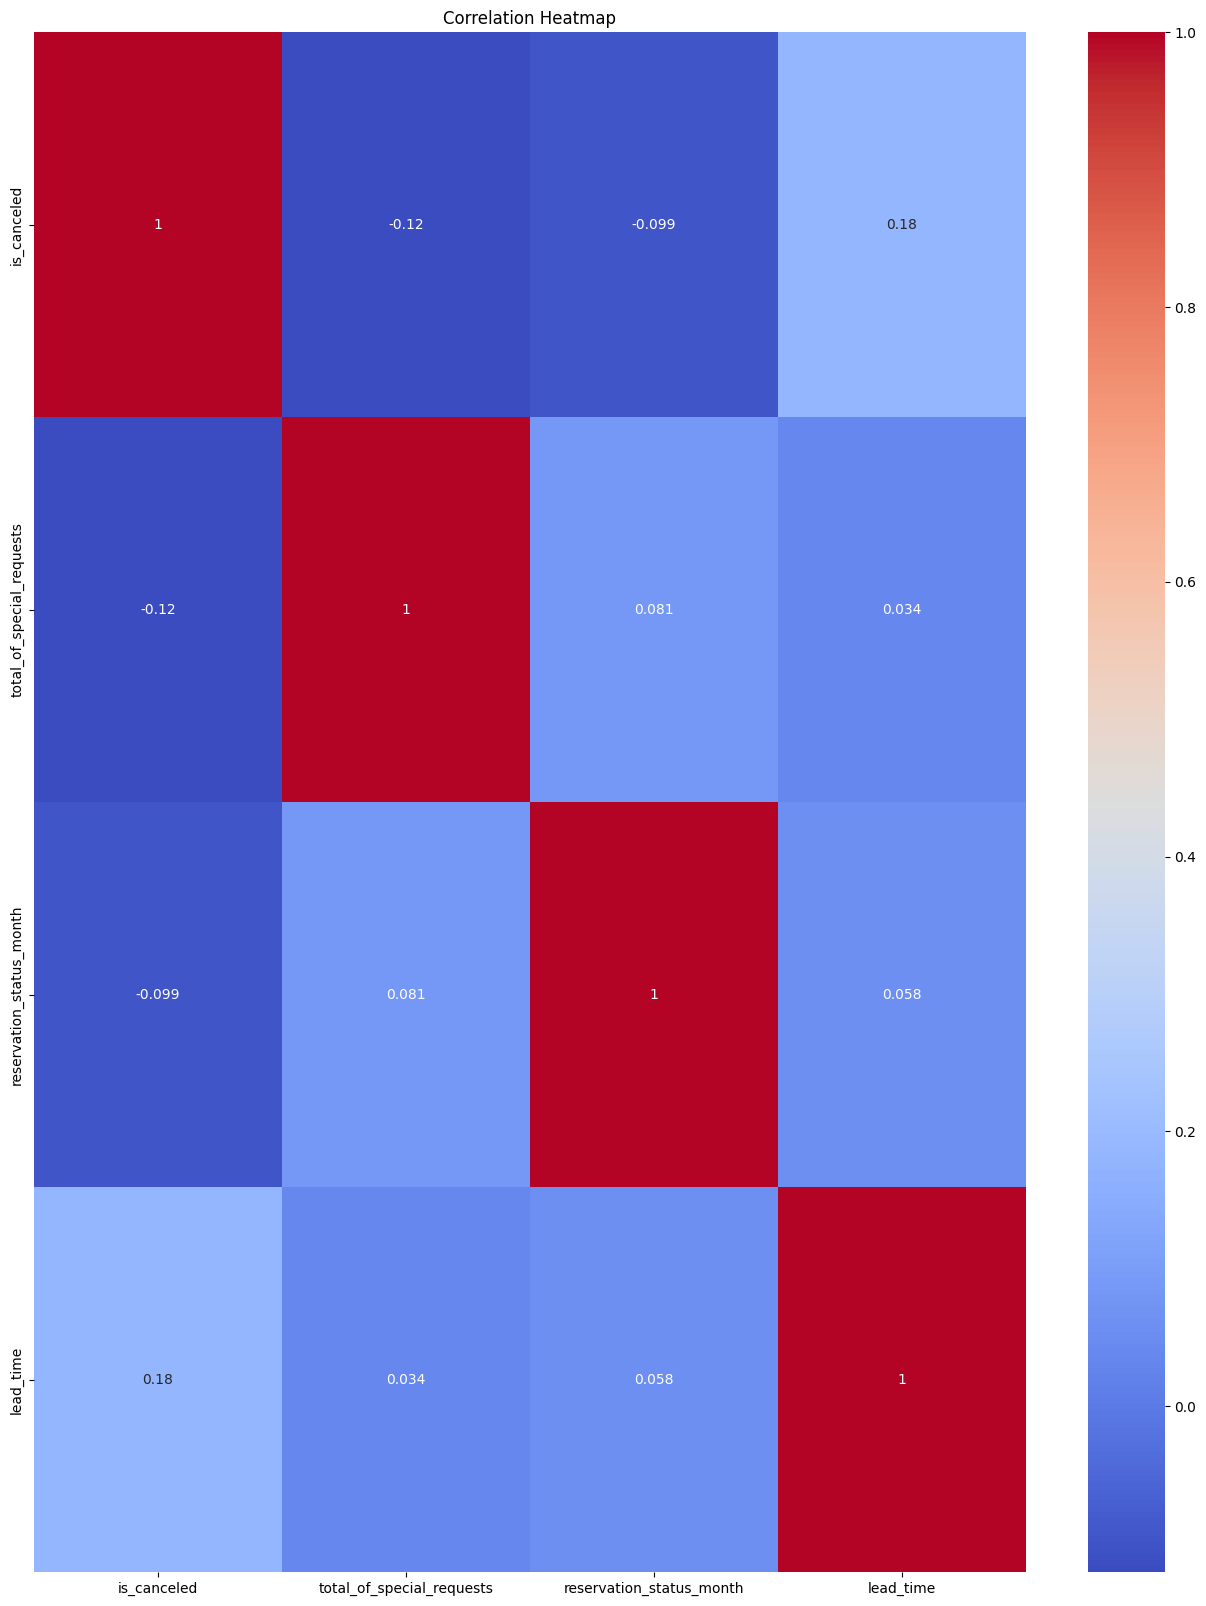

In [55]:
# Select only numerical columns from the DataFrame
numerical_data = cleaned_df_ml.select_dtypes(include=['int64', 'float64'])

# Correlation matrix for only numerical columns
corr_matrix = numerical_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(16, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**Insights from Correlation Heatmap**

The correlation heatmap provides Pearson correlation coefficients between pairs of numerical variables in the `cleaned_df_ml` dataset.

- The variable `is_canceled` has a weak positive correlation with `total_of_special_requests` (0.18) and a weak negative correlation with `reservation_status_month` and `lead_time` (-0.099 for both), indicating a slight influence on cancellation likelihood.
- `total_of_special_requests` shows very weak positive correlations with `reservation_status_month` and `lead_time` (0.081 and 0.034 respectively), suggesting that the number of special requests may not be a strong predictor for these variables.
- `reservation_status_month` and `lead_time` have a weak positive correlation (0.058), which might hint at a tendency for bookings made further in advance to have a particular reservation status.

## Save preprocessed data to new CSV file

In [56]:
# Save the cleaned DataFrame to a new CSV file
cleaned_csv_path = 'cleaned_ml_hotelbookings.csv'
cleaned_df_ml.to_csv(cleaned_csv_path, index=False)

cleaned_csv_path